# Ballistic deposition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import imageio

In [2]:
d=200
T=15000
# h=int(T/100)
h=d
particles_initial_position=np.random.randint(low=0, high=d, size=T)

In [3]:
n_frames=500
point_per_frame=T/n_frames

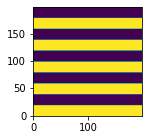

In [4]:
## a mask for better visualization
mask=np.ones((h,d))
step=int(h/10)
for i in range(int(h/step)):
    if i%2==0:
        mask[i*step:(i+1)*step,:]=2
        
plt.figure(figsize=(2,2*h/d))        
plt.imshow(mask,origin='lower');

In [5]:
def make_frame(frame_array,path,with_mask=True):
    plt.figure(figsize=(8,8))
    if with_mask:
        plt.imshow(frame_array*mask,origin='lower')
    else:
        plt.imshow(frame_array,origin='lower')
    plt.xticks([])
    plt.yticks([])
    plt.savefig(path)
    plt.close()

In [6]:
ground=np.zeros((h,d))
ground[0,:]=2
last_row=np.zeros(d)

image_path='./frames-200-2/'

for t in tqdm(range(T)):
    position = particles_initial_position[t]

    down = np.argmax(ground[:,position]*np.arange(h))
    right = np.argmax(ground[:,min(d-1,position+1)]*np.arange(h))
    left = np.argmax(ground[:,max(position-1,0)]*np.arange(h))
    
    rest_height = max(right,down+1,left)

    ground[rest_height,position]=2
    
    if t%point_per_frame==0:
        make_frame(ground,image_path+str(int(t/point_per_frame))+'.jpg',with_mask=True)

100%|██████████| 15000/15000 [00:36<00:00, 413.69it/s]


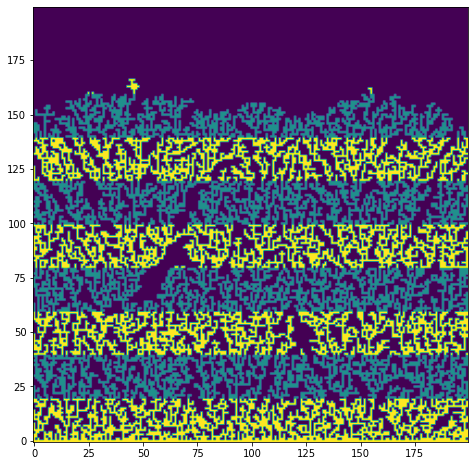

In [7]:
plt.figure(figsize=(8,8*h/d))
plt.imshow(ground*mask,origin='lower');

In [8]:
images = []
for t in tqdm(range(n_frames)):
    images.append(imageio.imread(image_path+str(t)+'.jpg'))
    
imageio.mimsave('ballistic200-2.gif', images,duration=0.05)

100%|██████████| 500/500 [00:01<00:00, 378.56it/s]
